# make a supplementary figure to illustrate the need for linear regression and that it works
- plot number of mutants per read across each sample.

- plot an example of a combo mutant, and the distribution of reads containing each particular mutation, and how linear regression delineates the individual mutant effects.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl


import sys
sys.path.append('../src/')
import plotting as pt
import nucleotides as nt
from constants import sample_to_positions


# load arial.ttf font from file
import matplotlib.font_manager as font_manager
font_path = '/data/davidding/dms/dms_plants/src/Arial.ttf'
#font_prop = font_manager.FontProperties(fname=font_path)

mpl.font_manager.fontManager.addfont(font_path)
mpl.rcParams['font.family'] = 'Arial'

dout = '/data/davidding/dms/plots/supp_linreg/'

#barcode log read ratio files with log2 not loge read ratio 
din_rcs = '/data/davidding/dms/illumina_data/data/clean/illumina/lrr_rcs_rescaled/'

#linear regression effects
din_lr = '/data/davidding/dms/illumina_data/linreg_all/scaled_coeffs/'

def get_target_containing_df(df, target_mut):
    df_containing_target = df.loc[df.mut_tss0.apply(lambda mutstr: target_mut in mutstr.split(':'))]
    return df_containing_target

# plot the histogram of number of mutations per read   

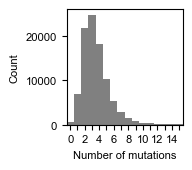

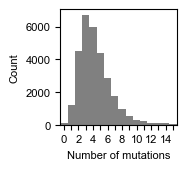

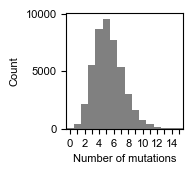

In [4]:
def plot_integer_centered_hist(data, max_val=15, figsize=(1.5,1.5), fout = None):
    """Plot histogram with bins centered on integers from 0 to max_val"""
    # Create bin edges that center bins on integers
    bins = np.arange(-0.5, max_val + 1.5, 1)
    
    plt.figure(figsize=figsize)
    plt.hist(data, bins=bins, color = 'grey')
    plt.xlim(-0.5, max_val + 0.5)
    xticks = np.arange(0, max_val + 1, 1)
    plt.xticks(xticks, labels = [x if x%2==0 else '' for x in xticks], fontsize=8)
    plt.yticks(fontsize=8)
    plt.xlabel('Number of mutations', fontsize=8)
    plt.ylabel('Count', fontsize=8)
    if fout != None:
        plt.savefig(fout, format='svg', bbox_inches='tight', dpi=300)
    plt.show()


for s in ['3A_sorghum', '3B_sorghum', '3C_sorghum']:
    df = pd.read_csv(din_rcs + s + '.csv')

    plot_integer_centered_hist(df.num_muts, fout = dout + s + '.svg')

In [7]:
# read in the linear regression inferred individual mutation effects of native gene library of PsbS
df_lr = pd.read_csv(din_lr + '3C_sorghum_mean_lrr_lr.csv')
df_lr = df_lr[df_lr['mut_in_prom_utr'] == True] 
target_mut = df_lr.iloc[5].mut # fetch the C-90 deletion

In [8]:
# print all the co-occuring mutations with that C-90 57bp deletion

df_containing_target = get_target_containing_df(df, target_mut)
display(df_containing_target)
combos=[]
all_muts = []
for i,r in df_containing_target.iterrows():
    muts = r.mut_tss0.split(':')
    combos.append(r.mut_tss0)
    all_muts.extend(muts)

unique_muts = set(all_muts)
print(combos)
print(unique_muts)

for m in unique_muts:
    print(m, df_lr.loc[df_lr.mut == m].beta.values, df_lr.loc[df_lr.mut == m].mean_lrr_observed_reads_log2.values)


,Unnamed: 0.1,bc,bc_count_dna_rep1,bc_count_rna_rep1,lrr_rep1_loge,len_bc_rep1,bc_count_dna_rep2,bc_count_rna_rep2,lrr_rep2_loge,len_bc_rep2,...,muts_opr_no_i1592a,muts_oprc,num_muts,mut_tss0,lrr_rep1_log2,lrr_rep2_log2,mean_lrr_log2,lrr_rep1,lrr_rep2,mean_lrr
24965,24965,TTTAGAAATTATCAT,416.0,2753.0,1.764515,15.0,416.0,3236.0,1.911785,15.0,...,C4704A:A4987_:C6054_:A6055_:G6056_:T6057_:T605...,C4704A:A4987_:C6054___________________________...,3,C-1440A:A-1157_:C-90__________________________...,2.545657,2.758122,2.65189,2.490493,2.567813,2.529153


['C-1440A:A-1157_:C-90_________________________________________________________']
{'A-1157_', 'C-90_________________________________________________________', 'C-1440A'}
A-1157_ [-0.08566893] [-0.09920289]
C-90_________________________________________________________ [2.44845932] [2.65188958]
C-1440A [0.0395374] [0.26784342]


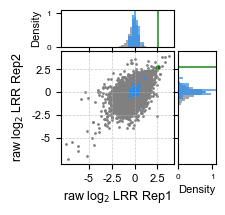

combos containing: A-1157_


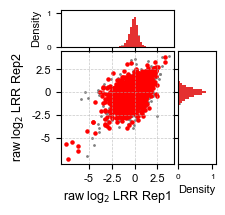

combos containing: C-90_________________________________________________________


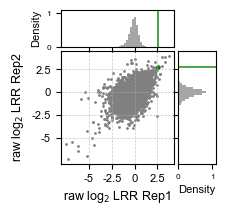

combos containing: C-1440A


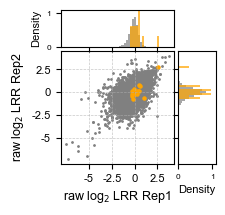

In [9]:
# plot of the combo for the C-90 deletion
def plot_selected_df_across_all(df_select, df, select_label = '', show_wt=True, color_highlight = 'pink', fout = None):
    fig = plt.figure(figsize=(2, 2))
    gs = fig.add_gridspec(2, 2, width_ratios=[3, 1], height_ratios=[1, 3], 
                          hspace=0.05, wspace=0.05)
    
    # Main scatter plot
    ax_main = fig.add_subplot(gs[1, 0])
    ax_main.scatter(df.lrr_rep1_log2, df.lrr_rep2_log2, s=1, color='grey', label='all')

    df_wt = df.loc[df.mut_tss0 == 'wt']

    # show wt
    if show_wt:
        ax_main.scatter(df_wt.lrr_rep1_log2, df_wt.lrr_rep2_log2, s=1, color='#1e90ff', label='wt')

    ax_main.scatter(df_select.lrr_rep1_log2, df_select.lrr_rep2_log2, s=5, color=color_highlight)
    main_ticklabels = [-5, -2.5, 0, 2.5]
    ax_main.set_xticks(main_ticklabels)
    ax_main.set_xticklabels(main_ticklabels, fontsize=8)
    ax_main.set_yticks(main_ticklabels)
    ax_main.set_yticklabels(main_ticklabels, fontsize=8)
    ax_main.set_xlabel(r"raw log$_2$ LRR Rep1", fontsize=9)
    ax_main.set_ylabel(r"raw log$_2$ LRR Rep2", fontsize=9)
    ax_main.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    # X-axis marginal histogram (top)
    ax_top = fig.add_subplot(gs[0, 0], sharex=ax_main)
    n, bins, p = ax_top.hist(df.lrr_rep1_log2, bins=50, color='grey', alpha=0.7, density=True)
    ax_top.hist(df_select.lrr_rep1_log2, bins=bins, color=color_highlight, alpha=0.7, density=True)
    if show_wt:
        ax_top.hist(df_wt.lrr_rep1_log2, bins=bins, color='#1e90ff', alpha=0.7, density=True)

    plt.setp(ax_top.get_xticklabels(), visible=False)

    ax_top.set_ylabel('Density', fontsize=8)
    ax_top.tick_params(axis='y', labelsize=6)
    ax_top.set_ylim(0,1.1)
    
    # Y-axis marginal histogram (right)
    ax_right = fig.add_subplot(gs[1, 1], sharey=ax_main)
    n, bins, p = ax_right.hist(df.lrr_rep2_log2, bins=50, color='grey', alpha=0.7, density=True, orientation='horizontal')
    ax_right.hist(df_select.lrr_rep2_log2, bins=bins, color=color_highlight, alpha=0.7, density=True, orientation='horizontal')
    if show_wt:
        ax_right.hist(df_wt.lrr_rep2_log2, bins=bins, color='#1e90ff', alpha=0.7, density=True, orientation='horizontal')

    plt.setp(ax_right.get_yticklabels(), visible=False)

    ax_right.set_xlabel('Density', fontsize=8)
    ax_right.tick_params(axis='x', labelsize=6)
    ax_right.set_xlim(0,1.1)

    if fout !=None:
        plt.savefig(fout, format = 'png', bbox_inches='tight', dpi=300)

    plt.show()

# plot the combo containing the C-90 deletion
plot_selected_df_across_all(df_containing_target, df, select_label = '', color_highlight= 'green', fout = dout + 'combo_C90_deletion.png')

cols = ['red', 'green', 'orange']
for i,m in enumerate(unique_muts):
    df_m = get_target_containing_df(df, m)
    print('combos containing:', m)
    plot_selected_df_across_all(df_m, df, select_label = m, show_wt =False, color_highlight=cols[i], fout = dout + 'combo_' + m[:5] + '.png')

In [10]:
# count how many times A-1157_ occurs 
df = pd.read_csv(din_rcs  + '3C_sorghum.csv')
df_mut = get_target_containing_df(df, 'A-1157_')
print(len(df))
print(len(df_mut))
print(len(df_mut)/len(df))



46195
26074
0.5644333802359562


# generate an alignment to visualize the homopolymer issue  

In [18]:
for r in nt.fasta_iter('/data/szchen/dms/snakemake/ref/ref_3C.fa'):
    wt_plasmid = r.sequence

tss_pos = sample_to_positions['3C'][1]

extra_bases = 20
print(wt_plasmid[tss_pos-1157-extra_bases: tss_pos - 1157 + extra_bases] )

gcccacaacggaaaacttcaaaaaaaaaaaaaggtcccac


In [29]:
target_mut = 'A-1157_'
print('>wild-type','\n', wt_plasmid[tss_pos-1157-extra_bases: tss_pos - 1157 + extra_bases].upper())
for i,r in df.iterrows():
    if i>30:
        break
    else:
        if not target_mut in r.mut_tss0.split(':'):
            print('>barcode:'+r.bc,'\n', wt_plasmid[tss_pos-1157-extra_bases: tss_pos - 1157 + extra_bases].upper())
        else:
            print('>barcode:'+r.bc,'\n', wt_plasmid[tss_pos-1157-extra_bases:tss_pos-1157-1].upper() +'-'+ wt_plasmid[tss_pos - 1157:tss_pos - 1157 + extra_bases].upper())

>wild-type 
 GCCCACAACGGAAAACTTCAAAAAAAAAAAAAGGTCCCAC
>barcode:TAGAATATGCCGAAA 
 GCCCACAACGGAAAACTTCAAAAAAAAAAAAAGGTCCCAC
>barcode:TTCGTTATTTTAGCC 
 GCCCACAACGGAAAACTTC-AAAAAAAAAAAAGGTCCCAC
>barcode:ATTAATCACCCAGCC 
 GCCCACAACGGAAAACTTC-AAAAAAAAAAAAGGTCCCAC
>barcode:GATTAATTAGGTTAA 
 GCCCACAACGGAAAACTTCAAAAAAAAAAAAAGGTCCCAC
>barcode:ACCTTCCCTGCGACA 
 GCCCACAACGGAAAACTTC-AAAAAAAAAAAAGGTCCCAC
>barcode:CGCATATTCTATACA 
 GCCCACAACGGAAAACTTCAAAAAAAAAAAAAGGTCCCAC
>barcode:CTTCTTGCTCTGGCC 
 GCCCACAACGGAAAACTTC-AAAAAAAAAAAAGGTCCCAC
>barcode:TGATCTTTATCACAT 
 GCCCACAACGGAAAACTTCAAAAAAAAAAAAAGGTCCCAC
>barcode:TAAGATATGTAGCGT 
 GCCCACAACGGAAAACTTCAAAAAAAAAAAAAGGTCCCAC
>barcode:TTACTTGAGTCATAA 
 GCCCACAACGGAAAACTTC-AAAAAAAAAAAAGGTCCCAC
>barcode:GTGTGGTGTTTTTCA 
 GCCCACAACGGAAAACTTCAAAAAAAAAAAAAGGTCCCAC
>barcode:GTCATGGAACTCTAT 
 GCCCACAACGGAAAACTTCAAAAAAAAAAAAAGGTCCCAC
>barcode:GGCATAAGTTGGGAG 
 GCCCACAACGGAAAACTTCAAAAAAAAAAAAAGGTCCCAC
>barcode:AACCTTAGCCTATTT 
 GCCCACAACGGAAAACTTC-AAAAAAAAAAAAGGT